# Practice Exercise - Linear Regression

### Problem Statement

The problem at hand is to predict the housing prices of a town or a suburb based on the features of the locality provided to us. In the process, we need to identify the most important features in the dataset. We need to employ techniques of data preprocessing and build a linear regression model that predicts the prices for us.

### Data Information

Each record in the database describes a Boston suburb or town. The data was drawn from the Boston Standard Metropolitan Statistical Area (SMSA) in 1970. Detailed attribute information can be found below-

Attribute Information (in order):
- CRIM: per capita crime rate by town
- ZN: proportion of residential land zoned for lots over 25,000 sq. ft.
- INDUS: proportion of non-retail business acres per town
- CHAS: Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
- NOX: nitric oxides concentration (parts per 10 million)
- RM: average number of rooms per dwelling
- AGE: proportion of owner-occupied units built prior to 1940
- DIS: weighted distances to five Boston employment centers
- RAD: index of accessibility to radial highways
- TAX: full-value property-tax rate per 10,000 dollars
- PTRATIO: pupil-teacher ratio by town
- LSTAT: %lower status of the population
- MEDV: Median value of owner-occupied homes in 1000 dollars.

### Import Necessary Libraries

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

### Load the dataset

In [ ]:
# load the csv
df = pd.read_csv('insurance.csv')

### Check the shape of the dataset

In [ ]:
print(df.shape)
df.isnull().sum()

(1338, 7)


,0
age,0
sex,0
bmi,0
children,0
smoker,0
region,0
charges,0


### Get the info regarding column datatypes

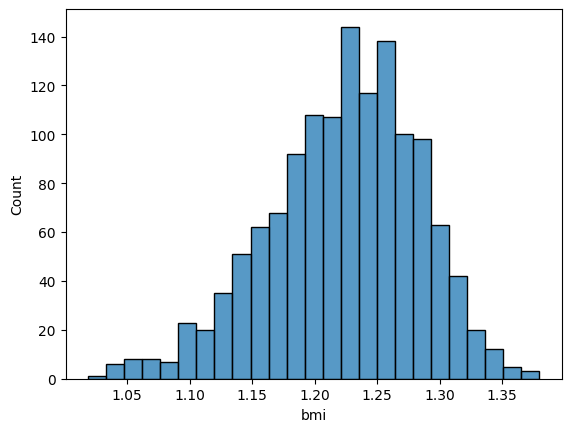

In [ ]:
# prompt: apply log transformation on bmi
df['bmi'] = np.log(df['bmi'])
# plot histplot
sns.histplot(df['bmi'])
plt.show()

### Get summary statistics for the numerical columns

In [ ]:
# correlation between age anc charges
df['charges'].corr(df['age'])


0.2990081933306476

### Exploratory Data Analysis

**Plot the distribution plots for all the numerical features and list your observations.**

**Plot the scatterplots for features and the target variable `MEDV` and list your observations.**

In [ ]:
# create dummy variables
df = pd.get_dummies(df, drop_first=True)
df.head()

,age,bmi,children,charges,sex_male,smoker_yes,region_northwest,region_southeast,region_southwest
0,19,1.202560,0,16884.92400,False,True,False,False,True
1,18,1.258340,1,1725.55230,True,False,False,True,False
2,28,1.251765,3,4449.46200,True,False,False,True,False
3,33,1.138661,0,21984.47061,True,False,True,False,False
4,32,1.212878,0,3866.85520,True,False,True,False,False


**Plot the correlation heatmap and list your observations.**

### Split the dataset

Split the data into the dependent and independent variables, and further split it in a ratio of 70:30 for train and test sets.

In [ ]:
# split the data
X = df.drop('charges', axis=1)
y = df['charges']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((936, 8), (402, 8), (936,), (402,))

In [ ]:
# create linear regresision model
model = LinearRegression()
model.fit(X_train, y_train)
print(model.intercept_)
print(r2_score(y_train, model.predict(X_train)))


-45058.461841709766
0.7431704399301285


### Model Building

**Fit the model to the training set**

In [ ]:
# prompt: add PolynomialFeatures(degree=2, interaction_only=True)

from sklearn.preprocessing import PolynomialFeatures
poly = PolynomialFeatures(degree=2, interaction_only=True)
X_train_poly = poly.fit_transform(X_train)
X_test_poly = poly.transform(X_test)
model_poly = LinearRegression()
model_poly.fit(X_train_poly, y_train)
print(r2_score(y_train, model_poly.predict(X_train_poly)))
print(r2_score(y_train, model_poly.predict(X_trai_poly)))

0.8357553891376827


**Get the score on training set**

In [ ]:
from sklearn.metrics import mean_absolute_error
y_pred = model.predict(X_test)
mean_absolute_error(y_test, y_pred)

4222.974551874346

**Write your own function for the R-squared score.**

**Get the score on test set**

**Get the RMSE on test set**

**Get the model coefficients.**

**Automate the equation of the fit**